In [1]:
import os
import numpy as np
from save_model_metadata import save_model_metadata
from load_annotation_data import load_annotation_data
from create_training_tiles import create_training_tiles
from train_segmentation_model import train_segmentation_model
from classify_images import classify_images


In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'CODA_python_08_19_2024'

WS = [[0, 0, 0, 0, 2, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [6, 4, 2, 3, 5, 1,7], []]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...
Plotting cmap took 0.0 minutes and 0.029122114181518555 seconds
Saving metadata took 0.0 minutes and 0.10239863395690918 seconds


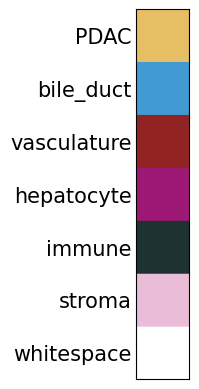

In [6]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [3]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 6: Liv-17_0001
Checking parameters took 0.0 minutes and 0.1336207389831543 seconds
 annotation data previously loaded
Image 2 of 6: Liv-17_0041
Checking parameters took 0.0 minutes and 0.0800786018371582 seconds
 annotation data previously loaded
Image 3 of 6: Liv-17_0081
Checking parameters took 0.0 minutes and 0.1401503086090088 seconds
 annotation data previously loaded
Image 4 of 6: Liv-17_0121
Checking parameters took 0.0 minutes and 0.11707878112792969 seconds
 annotation data previously loaded
Image 5 of 6: Liv-17_0161
Checking parameters took 0.0 minutes and 0.07654166221618652 seconds
 annotation data previously loaded
Image 6 of 6: Liv-17_0199
Checking parameters took 0.0 minutes and 0.08805346488952637 seconds
 annotation data previously loaded


In [4]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 544424200.0 pixels of PDAC, 41% of the most common class.
 There are 32034500.0 pixels of bile duct, 2% of the most common class.
 There are 92471600.0 pixels of vasculature, 7% of the most common class.
 There are 1312608300.0 pixels of hepatocyte. This is the most common class.
 There are 33182000.0 pixels of immune, 2% of the most common class.
 There are 655049200.0 pixels of stroma, 49% of the most common class.
 There are 817792400.0 pixels of whitespace, 62% of the most common class.

Building training tiles...
Starting time for the while loop
Saving big tiles
  9 of 15 training images completed in 3 minutes
  Used 131.6% counts and 27.6% unique annotations of PDAC
  Used 563.2% counts and 100.0% unique annotations of bile duct
  Used 431.9% counts and 86.1% unique annotations of vasculature
  Used 270.9% counts and 47.0% unique annotations of hepatocyte
  Used 639.5% counts and 100.0% unique annotations o

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
500/500 [==============================] - 171s 323ms/step - loss: 0.2962 - accuracy: 0.8936 - val_loss: 0.3283 - val_accuracy: 0.8914
Epoch 2/8
500/500 [==============================] - 147s 292ms/step - loss: 0.1694 - accuracy: 0.9363 - val_loss: 0.2390 - val_accuracy: 0.9118
Epoch 3/8
500/500 [==============================] - 150s 299ms/step - loss: 0.1315 - accuracy: 0.9496 - val_loss: 0.1615 - val_accuracy: 0.9411
Epoch 4/8
500/500 [==============================] - 153s 305ms/step - loss: 0.1255 - accuracy: 0.9523 - val_loss: 0.1456 - val_accuracy: 0.9459
Epoch 5/8
500/500 [==============================] - 156s 311ms/step - loss: 0.1009 - accuracy: 0.9609 - val_loss: 0.1512 - val_accuracy: 0.9454
Epoch 6/8
500/500 [==============================] - 156s 310ms/step - loss: 0.0828 - accuracy: 0.9676 - val_loss: 0.0920 - val_accuracy: 0.9642
Epoch 7/8

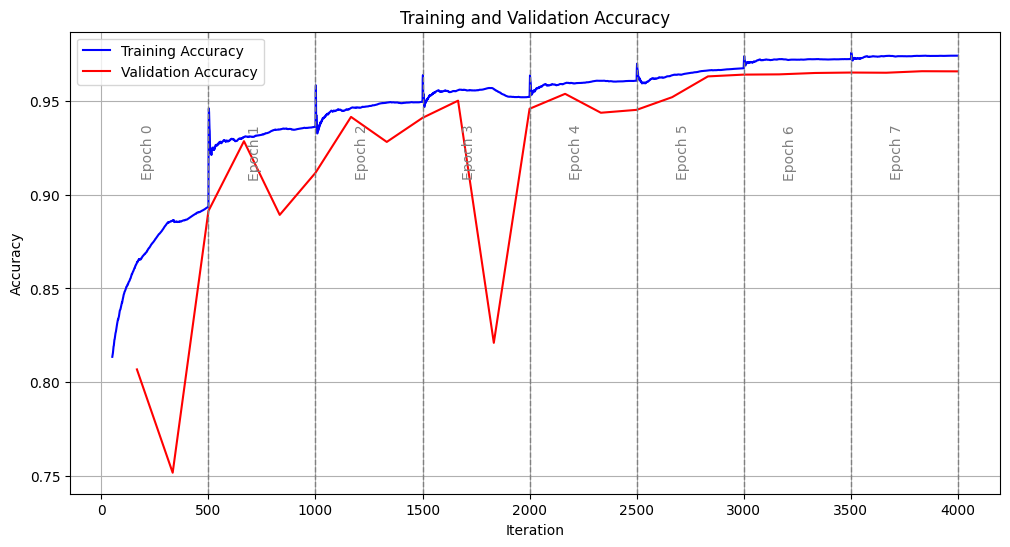

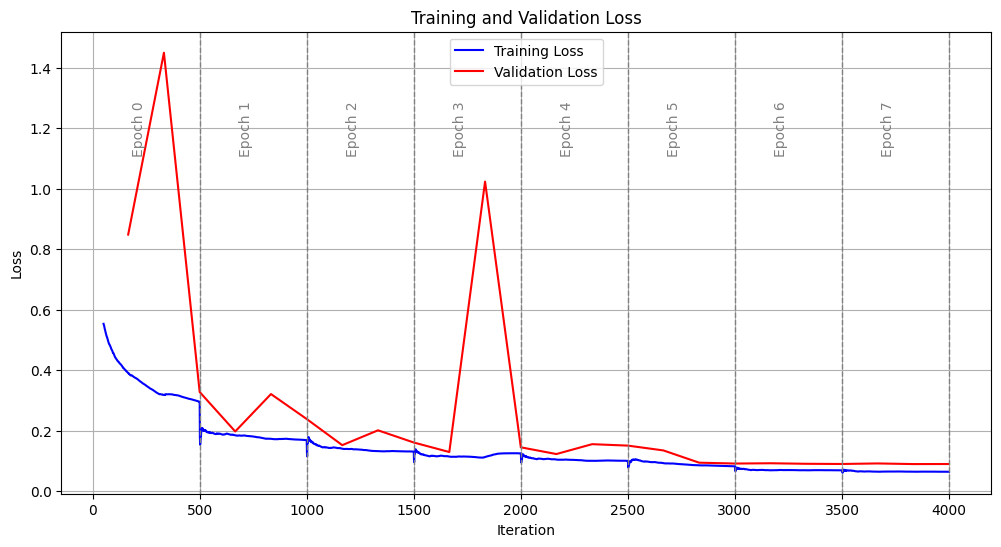

In [5]:
train_segmentation_model(pthDL)

In [6]:
classify_images(pthim,pthDL)

KeyError: 'model'

In [3]:
import pickle

# Replace 'file.pkl' with the path to your .pkl file
with open(r'C:\Users\labuser1\Desktop\testing\net.pkl', 'rb') as file:
    data = pickle.load(file)
keys = list(data.keys())
print("Keys:", keys)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://2fe8430f-ab6b-4f5d-8610-f90f63e0f6a6/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.